<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_12-Trees/Module_12_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 12 Assignment

Name


## Instructions

In this assignment, you will work with **three separate, randomly generated datasets**.

**RUN THIS DATASET AS IS TO GENERATE THE THREE DATASETS.**

These datasets represent different views of the same underlying population and must be:

* merged,

* cleaned and prepared,

* explored (EDA),

* and used to fit and compare three supervised learning models:

* Random Forest

* XGBoost

* CatBoost

You will also use **grid search** and **cross-validation** to tune hyperparameters, and you will end with a **written summary** of your findings and recommendations.

---

### Learning Goals

By the end of this assignment, you should be able to:

* Engineer and justify join keys to merge multiple real-world style datasets.
* Perform data cleaning and preparation appropriate for tree-based models.
* Conduct exploratory data analysis (EDA) to understand structure, quality, and relationships.
* Use `GridSearchCV` with cross-validation to tune model hyperparameters.
* Compare Random Forest, XGBoost, and CatBoost on the same predictive task.
* Communicate your modeling process and conclusions clearly.

---

### Instructions

This notebook will generate **three datasets** (`demographics.csv`, `behavioral_metrics.csv`, `survey_scores.csv`). Treat these as if they came from three different information systems. Do all of your work in this notebook.

Organize your work into clearly labeled sections.

#### 1. Data loading and initial inspection

1. Load all three datasets into pandas DataFrames.
2. For each dataset:

   * Display the first few rows.
   * Report the number of rows and columns.
   * List column names and data types.
   * Briefly describe, in your own words, what each dataset appears to represent.

#### 2. Data merging

1. Identify potential keys or combinations of columns that could be used to **link** the datasets.
2. Engineer any necessary join keys.
3. Merge the three datasets into a single modeling table.
4. Clearly document:

   * Your merging strategy (which keys, which type of joins).
   * How you handled unmatched rows and duplicates.
   * Any assumptions you made.

#### 3. Data cleaning and preparation

On the merged dataset:

1. Handle missing data:

   * Identify variables with missing values.
   * Decide and justify how you impute or otherwise handle missingness.

2. Remove or transform problematic features:

   * Drop constants or near-constant features, if any.
   * Decide what to do with PII-like fields (e.g., full address, raw email).

3. Encode categorical variables appropriately for tree-based models.

4. Consider scaling or transformation only where it is clearly needed (note: tree-based models are generally robust to raw scales, but you should be able to explain your choices).

5. Produce a final, clean feature matrix `X` and target vector `y` ready for modeling.

#### 4. Exploratory data analysis (EDA)

Conduct and summarize an EDA on the **merged and cleaned** dataset, including:

* Univariate summaries (distributions, counts).
* Bivariate relationships with the target variable (e.g., boxplots or group means for important features).
* Any insights about class imbalance, outliers, or feature importance you might anticipate.

Include a short written interpretation of the most important patterns you observe.

#### 5. Modeling setup

1. Choose and justify a data-splitting and evaluation strategy:

   * For example, a train/test split combined with **cross-validation** on the training set for hyperparameter tuning.
   * Use stratification if appropriate.
2. Clearly define:

   * The evaluation metric(s) you will use (e.g., accuracy, F1, ROC AUC).
   * Any random seeds (`random_state`) used for reproducibility.

#### 6. Random Forest model

1. Fit a **RandomForestClassifier** on the dataset.
2. Use **grid search with cross-validation** to tune a **small but meaningful** set of hyperparameters (for example, 2–3 hyperparameters with a few values each).
3. Report:

   * The best hyperparameters found.
   * Cross-validated performance on the training set.
   * Performance on the held-out test set.
4. Examine and briefly interpret feature importance (or similar measures) for this model.

#### 7. XGBoost model

1. Fit an XGBoost classifier (e.g., `xgboost.XGBClassifier`) on the same prepared data.
2. Use **grid search with cross-validation** to tune a small set of hyperparameters.
3. Report:

   * The best hyperparameters.
   * Cross-validated performance and test performance, using the same metrics as for Random Forest.
4. Compare its behavior and performance to Random Forest.

#### 8. CatBoost model

1. Fit a **CatBoostClassifier** on the same dataset.
2. Again, use **grid search or CatBoost’s built-in tuning options** with cross-validation to tune a small set of hyperparameters.
3. Report:

   * The best hyperparameters.
   * Cross-validated and test performance.
4. Discuss how CatBoost handles categorical variables and missing data relative to the other models.

#### 9. Model comparison and final summary

Create a concise comparison of the three models:

* Present a small table or summary that includes:

  * Algorithm
  * Best hyperparameters (or a subset)
  * Cross-validated performance
  * Test performance
* In a short written section at the end of the notebook, answer:

  1. Which model performed best on your chosen evaluation metric(s)?
  2. How stable were the models across cross-validation folds?
  3. How did the different algorithms handle the messy, multi-table dataset?
  4. If you had to deploy one of these models in a real setting, which would you choose and why?

Your final section should read as a brief report that a technical stakeholder could understand without reading your entire notebook.


## Getting Started

* Save a Copy in Drive
* Remove Copy of in filename
* Edit your name
* Clean up Colab Notebooks folder
* Submit shared link
* Do all your work in this notebook
* Run this notebook as is so you can get your simulated datasets
* You will find your simulated datasets in the session storage (click on the folder icon in the left panel)
* Be aware that each time this notebook is executed will result in a new simulated data csv files

**Keep in mind**

* If your model metrics are too high, almost perfect, find and remove features that are have a near perfect relationship with the DV. Document your rational.

**PII Fields**

* Names, email, phone, full address, and exact DOB are being generated. PII should be removed or transformed (hashing/tokenizing, extracting non-identifying parts like state or age-in-years) before modeling. Justify your actions.

**Missingness**

* Because missingness is injected across many columns at varying percentages, review MCAR, MNAR, and MAR and document your plan to drop vs impute; and document why.

**Data Hygiene Goals**

* Handle duplicates, PII, outliers, missingness, and type casting. Briefly justify each decision.

**Train/Validation Protocol**

* Use a proper holdout or cross-validation. Fit encoders/imputers on **train only** and apply to validation/test. State the split logic (stratified for classification if imbalance exists).

**Leakage and Bias Checks**

* Explicitly identify potential leakage sources, and discuss whether demographic variables should be included, excluded, or aggregated—and why.

**Compare Outputs**

* Compare RandomForest, XGBoost, and CatBoost models. Use GridSearch to identify best hyperparameters and use cross validation.

# Data Prep Introduction

* Types and characteristics of data
* Duplicates
* Constants
* Quasi-Constants
* Missing data
* Outliers
* Datetime
* Feature creation
* Discretization
* Categorical encoding
* Variable transformation
* Scaling

When performing data preparation, the order of operations is crucial for a robust and reproducible machine learning pipeline. While there isn't one single "best" order that fits every scenario, a logical and widely accepted sequence follows a general flow from broad data quality checks to more specific feature transformations. This ensures that early steps, like removing bad data, don't get skewed by later transformations.

The general best-practice order is:

1.  **Remove Bad Data and Redundancy:** Begin by identifying and removing data that's problematic at a fundamental level.
    * **Duplicates**: Removing duplicate rows is the first step. They can bias a model and inflate performance metrics.
    * **Constants**: Columns with only one unique value (constants) provide no information for a model to learn from. Removing them early reduces dimensionality and simplifies your dataset.
    * **Quasi-Constants**: Similar to constants, these features have very little variance (e.g., 99% of values are the same). It's generally a good idea to remove them as they offer minimal predictive power.

2.  **Handle Missing Data and Outliers:** Once your data is free of redundant rows and features, you can address quality issues within the remaining columns.
    * **Missing Data**: Decide on a strategy for handling missing values. This can involve dropping rows or columns with too much missing data, or **imputing** values using methods like the mean, median, or more advanced techniques.
    * **Outliers**: After addressing missing data, identify and handle outliers. Outliers can heavily influence the mean and other statistics, so it's important to deal with them before transformations or scaling.

3.  **Perform Feature Engineering:** This is a creative and domain-specific step where you can extract more information from your existing features.
    * **Datetime**: Extracting meaningful features from datetime columns, such as month, day of the week, or holiday flags, is a common and powerful technique. This should be done before more generic transformations.
    * **Feature Creation**: This is the core of feature engineering, where you create new variables based on your domain knowledge. For example, creating a `BMI` feature from `height` and `weight`.

4.  **Transform Variables and Features:** With a clean and feature-rich dataset, you can now prepare the variables for the specific requirements of your chosen model.
    * **Discretization**: If needed, convert continuous numerical features into discrete bins. This is often used for algorithms that benefit from binned data, like certain tree-based models.
    * **Categorical Encoding**: Convert all categorical features (which may have been `object` or `category` data types) into a numerical format. This is a non-negotiable step for most machine learning algorithms. The choice between one-hot encoding, label encoding, etc., depends on the nature of the data.

5.  **Scale Features:** The final step before training a model is often scaling, which adjusts the range of numerical features.
    * **Scaling**: This is especially important for distance-based algorithms like **K-nearest Neighbors** and models that use gradient descent, such as **Linear Regression** and **Neural Networks**. Common techniques are **Normalization** (Min-Max Scaling) and **Standardization** (Z-Score Scaling). This should be done **after** all other transformations to prevent data leakage and ensure the scaling is based on the final, prepared feature values.


# Create Data

### Seed the Project

In [1]:
import time
import numpy as np
import random

def generate_user_seed():
    # Get current time in nanoseconds (more granular)
    nanoseconds = time.time_ns()

    # Add a small random component to further reduce collision chances
    random_component = random.randint(0, 1000)  # Adjust range as needed

    # Combine them (XOR is a good way to mix values)
    seed = nanoseconds ^ random_component

    # Ensure the seed is within the valid range for numpy's seed
    seed = seed % (2**32)  # Modulo to keep it within 32-bit range

    return seed

user_seed = generate_user_seed()
print(user_seed)
random_state = np.random.seed(user_seed)

3766864616


### Faker

In [2]:
pip install Faker

In [3]:
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [4]:
# create demographic data
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  binary = np.random.choice(['binary_1', 'binary_2'], p=[0.5, 0.5])
  output.append({
        'binary': binary, # sex assigned at birth
        'given_name': fake.first_name_female() if binary=='binary_1' else fake.first_name_male(),
        'datetime': fake.date_time_this_decade(),
        'surname': fake.last_name(),
        'date_of_birth': fake.date_of_birth(),
        'day_of_week': fake.day_of_week(),
        'phone_number': fake.phone_number(),
        'email': fake.email(),
        'address': fake.address(),
        'city': fake.city(),
        'state': np.random.choice(state_names),
        'zipcode': fake.zipcode(),
        })

demographics = pd.DataFrame(output)
demographics.head()

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,state,zipcode
0,binary_2,David,2025-06-23 02:07:52.847781,Munoz,2021-07-20,Monday,+1-651-271-2498x969,jasonpacheco@example.org,"4665 Virginia Glen Apt. 429\nNew Kurttown, NH ...",North Colton,South Dakota,63108
1,binary_1,Monica,2021-09-16 20:16:06.862361,Richards,2015-10-09,Monday,+1-870-768-2150x176,levyjonathan@example.com,"5528 Russell Rapid\nCraigburgh, NM 25759",Jessicafort,Connecticut,36102
2,binary_1,Diana,2020-03-30 16:02:20.484065,Rogers,1949-05-31,Friday,218.407.1436x3703,deanball@example.org,"54022 Michelle Hills Apt. 091\nWest Richard, W...",Joyceside,Wisconsin,84152
3,binary_2,Julian,2024-06-09 10:47:07.068033,Davis,1970-04-30,Tuesday,293.630.5397x2056,howardkrista@example.org,"039 John Lake Suite 987\nEast Andrewfurt, AZ 7...",Russelltown,Wyoming,34463
4,binary_1,Brittany,2024-06-11 05:04:00.431472,Rogers,1967-09-29,Thursday,582-935-9191,wongcolleen@example.net,"90681 Barbara Corners Apt. 123\nEast Linda, AK...",Port Aliciamouth,Florida,41580


In [5]:
def parse_address_v2(text):
  """
  Parses an address string into street address, city, state, and zipcode.
  This version handles potential variations in the input format.

  Args:
    text: The address string to parse.

  Returns:
    A dictionary containing the parsed address components.
  """

  try:
    # Split the input into lines
    lines = text.strip().split('\n')

    # Extract the street address from the first line
    street_address = lines[0].strip()

    # Extract the city, state, and zipcode from the second line
    city_state_zip = lines[1].strip().split(',')
    city = city_state_zip[0].strip()
    state_zip = city_state_zip[1].strip().split()
    state = state_zip[0].strip()
    zipcode = state_zip[1].strip()

    return {
        'street_address': street_address,
        'city': city,
        'state': state,
        'zipcode': zipcode
    }

  except (IndexError, ValueError):
    return None

# Example usage
text = "80974 Jeffrey Mountains\nWest Benjamin, IL 82801"
address = parse_address_v2(text)

if address:
  print(address)
else:
  print("Could not parse the address.")

{'street_address': '80974 Jeffrey Mountains', 'city': 'West Benjamin', 'state': 'IL', 'zipcode': '82801'}


In [6]:
# Apply the parse_address function to each row of the 'address' column
demographics[['nu_address', 'nu_city', 'nu_state', 'nu_zipcode']] = demographics['address'].apply(lambda x: pd.Series(parse_address_v2(x)))

demographics.head()

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,state,zipcode,nu_address,nu_city,nu_state,nu_zipcode
0,binary_2,David,2025-06-23 02:07:52.847781,Munoz,2021-07-20,Monday,+1-651-271-2498x969,jasonpacheco@example.org,"4665 Virginia Glen Apt. 429\nNew Kurttown, NH ...",North Colton,South Dakota,63108,4665 Virginia Glen Apt. 429,New Kurttown,NH,12771
1,binary_1,Monica,2021-09-16 20:16:06.862361,Richards,2015-10-09,Monday,+1-870-768-2150x176,levyjonathan@example.com,"5528 Russell Rapid\nCraigburgh, NM 25759",Jessicafort,Connecticut,36102,5528 Russell Rapid,Craigburgh,NM,25759
2,binary_1,Diana,2020-03-30 16:02:20.484065,Rogers,1949-05-31,Friday,218.407.1436x3703,deanball@example.org,"54022 Michelle Hills Apt. 091\nWest Richard, W...",Joyceside,Wisconsin,84152,54022 Michelle Hills Apt. 091,West Richard,WY,93211
3,binary_2,Julian,2024-06-09 10:47:07.068033,Davis,1970-04-30,Tuesday,293.630.5397x2056,howardkrista@example.org,"039 John Lake Suite 987\nEast Andrewfurt, AZ 7...",Russelltown,Wyoming,34463,039 John Lake Suite 987,East Andrewfurt,AZ,73968
4,binary_1,Brittany,2024-06-11 05:04:00.431472,Rogers,1967-09-29,Thursday,582-935-9191,wongcolleen@example.net,"90681 Barbara Corners Apt. 123\nEast Linda, AK...",Port Aliciamouth,Florida,41580,90681 Barbara Corners Apt. 123,East Linda,AK,60469


In [7]:
# drop address, city, state, zipcode and rename nu_ etc.
demographics.drop(['address', 'city', 'state', 'zipcode'], axis=1, inplace=True)
demographics.rename(columns={'nu_address': 'address', 'nu_city': 'city', 'nu_state': 'state', 'nu_zipcode': 'zipcode'}, inplace=True)
demographics.head()

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,state,zipcode
0,binary_2,David,2025-06-23 02:07:52.847781,Munoz,2021-07-20,Monday,+1-651-271-2498x969,jasonpacheco@example.org,4665 Virginia Glen Apt. 429,New Kurttown,NH,12771
1,binary_1,Monica,2021-09-16 20:16:06.862361,Richards,2015-10-09,Monday,+1-870-768-2150x176,levyjonathan@example.com,5528 Russell Rapid,Craigburgh,NM,25759
2,binary_1,Diana,2020-03-30 16:02:20.484065,Rogers,1949-05-31,Friday,218.407.1436x3703,deanball@example.org,54022 Michelle Hills Apt. 091,West Richard,WY,93211
3,binary_2,Julian,2024-06-09 10:47:07.068033,Davis,1970-04-30,Tuesday,293.630.5397x2056,howardkrista@example.org,039 John Lake Suite 987,East Andrewfurt,AZ,73968
4,binary_1,Brittany,2024-06-11 05:04:00.431472,Rogers,1967-09-29,Thursday,582-935-9191,wongcolleen@example.net,90681 Barbara Corners Apt. 123,East Linda,AK,60469


### Create Independent Variable Correlated with Class

In [8]:
import numpy as np
import pandas as pd

def generate_feature(df, class_col, coeff, intercept):
    """
    Generates normally distributed feature data for a logistic regression model.

    Args:
        df: The pandas DataFrame containing the class column.
        class_col: The name of the class column (containing 0s and 1s).
        coeff: The coefficient for the feature in the logistic regression model.
        intercept: The intercept of the logistic regression model.

    Returns:
        A pandas Series containing the generated feature data.
    """

    # Generate probabilities based on the class
    probs = np.random.rand(len(df))  # Initial random probabilities
    probs = np.where(df[class_col] == 1, probs * 0.8 + 0.2, probs * 0.8)  # Adjust for class

    # Apply the inverse logit (logit) function
    logits = np.log(probs / (1 - probs))

    # Calculate the feature values
    feature_values = (logits - intercept) / coeff

    return pd.Series(feature_values)



### Make Classification

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

def make_linear_y(row):
  model = LogisticRegression()
  model.fit(X, y)
  coefficients = model.coef_
  intercept = model.intercept_
  f_of_x = intercept + coefficients[0][0]*row['informative_1'] + coefficients[0][1]*row['informative_2']
  # print(f_of_x[0])
  return f_of_x[0]

# Set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=random_state)
df = pd.DataFrame(X, columns=['informative_1', 'informative_2'])
df = pd.concat([demographics, df], axis=1).reset_index(drop=True)

df['target'] = df.apply(make_linear_y, axis=1) # an independent variable
df['class'] = y # the dependent variable
df['corr_feature_class'] = generate_feature(df, 'class', 0.5, -1)
df.head()

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,state,zipcode,informative_1,informative_2,target,class,corr_feature_class
0,binary_2,David,2025-06-23 02:07:52.847781,Munoz,2021-07-20,Monday,+1-651-271-2498x969,jasonpacheco@example.org,4665 Virginia Glen Apt. 429,New Kurttown,NH,12771,2.159336,-1.382368,-3.374899,0,1.436005
1,binary_1,Monica,2021-09-16 20:16:06.862361,Richards,2015-10-09,Monday,+1-870-768-2150x176,levyjonathan@example.com,5528 Russell Rapid,Craigburgh,NM,25759,0.535769,-1.090274,-2.311294,0,2.369917
2,binary_1,Diana,2020-03-30 16:02:20.484065,Rogers,1949-05-31,Friday,218.407.1436x3703,deanball@example.org,54022 Michelle Hills Apt. 091,West Richard,WY,93211,1.772764,1.797615,3.956910,1,5.385925
3,binary_2,Julian,2024-06-09 10:47:07.068033,Davis,1970-04-30,Tuesday,293.630.5397x2056,howardkrista@example.org,039 John Lake Suite 987,East Andrewfurt,AZ,73968,-1.828572,0.153594,1.100299,0,3.450300
4,binary_1,Brittany,2024-06-11 05:04:00.431472,Rogers,1967-09-29,Thursday,582-935-9191,wongcolleen@example.net,90681 Barbara Corners Apt. 123,East Linda,AK,60469,0.761225,0.013490,0.145204,1,2.234637


### Automation Functions

1. gen_null(series, perc)
2. gen_quasi_constants(primary_label, variation_percentage=.2, replace=False)
3. gen_normal_data(mu=0, std=1, size=len(df))
4. gen_uniform_data(size=len(df))
5. gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
6. gen_correlated_normal_series(original_series, target_correlation, size=len(df))
7. gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
8. gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
9. gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000)
10. gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10)
11. random_choice_data(choices, size)

In [10]:
# functions
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def gen_null(series, perc):
  """
  Introduces null values (np.nan) into a list based on a specified percentage.

  Args:
      var: The variable to modify.
      perc: The percentage of values to replace with nulls (0-100).

  Returns:
      The modified variable with null.
  """
  var = series.copy()
  num_nulls = int(len(var) * (perc / 100))
  indices_to_replace = np.random.choice(len(var), num_nulls, replace=False)

  for idx in indices_to_replace:
      var[idx] = np.nan

  return var

def gen_quasi_constants(primary_label, variation_percentage=.2, size=len(df)):
  """
  Generates quasi-constant labels for a Series, with a small percentage of variation.

  Args:
      primary_label: The main label to use for most values.
      variation_percentage: The percentage of labels to vary (0-100).

  Returns:
      A new Series containing the quasi-constant labels.
  """

  series = pd.Series(np.full(size, primary_label))
  num_variations = int(size * (variation_percentage / 100))
  variation_indices = np.random.choice(series.index, num_variations, replace=False)
  primary_label = primary_label + '_0'
  variation1 = primary_label + '_1'
  variation2 = primary_label + '_2'

  labels = pd.Series([primary_label] * len(series), index=series.index)
  labels.loc[variation_indices] = np.random.choice([variation1, variation2], size=num_variations)  # Adjust variations as needed

  return labels

def gen_normal_data(mu=0, std=1, size=len(df)):
  """
  Generates a normal dataset given the mean and standard deviation

  Args:
        mu: The mean of the normal distribution.
        std: The standard deviation of the normal distribution.
        size: The number of data points to generate.

  Returns:
        A normally distributed series.
  """
  return np.random.normal(mu, std, size)

def gen_uniform_data(size=len(df)):
  """
  Generates a uniform dataset

  Args:
        size: The number of data points to generate.

  Returns:
        A uniform distributed series.
  """
  return np.random.uniform(size=size)

def gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df)):
  """
  Generates two datasets with a multivariate normal distribution given the mean and covariance matrix

  Args:
        mean: The mean of each of the datasets.
        cov: The covariance matrix of the datasets.
        size: The number of data points to generate.

  Returns:
        Two correlated series.
  """
  ds1, ds2 = np.random.multivariate_normal(mean, cov, size, tol=1e-6).T # ds = dataset
  return ds1, ds2

def gen_correlated_normal_series(original_series, target_correlation, size=len(df)):
  """
  Generates a correlated series based on a given series.

  This function takes an original series as input and generates a new series
  that is correlated with the original series. The correlation between the
  original and generated series is approximately equal to the specified
  target correlation.

  The generated series is created by linearly transforming the original series
  and adding Gaussian noise with an adjusted standard deviation to achieve the
  desired correlation.

  Args:
      original_series (numpy.ndarray): The original series.
      target_correlation (float): The desired Pearson correlation coefficient
          between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series.
  """
  return np.mean(original_series) + target_correlation * (original_series - np.mean(original_series)) \
  +  np.random.normal(0, np.sqrt(1 - target_correlation**2) * np.std(original_series), len(original_series))
  """
  Explanation

  This one-liner leverages the properties of linear transformations and normal distributions to generate a correlated series.

  It first centers the original_series by subtracting its mean.
  It then scales this centered series by the target_correlation.
  Finally, it adds Gaussian noise with a standard deviation adjusted to ensure the overall correlation matches the target_correlation.
  """

def gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df)):
  """
  Work in progress

  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.
      size: The number of data points to generate.

  Returns:
      The generated correlated series with a uniform distribution.
  """
  z_scores = (original_series - np.mean(original_series)) / np.std(original_series)
  correlation_coefficient=.7
  return norm.cdf(correlation_coefficient * norm.ppf(np.random.uniform(size=size)) + np.sqrt(1 - correlation_coefficient**2) * z_scores)

def pearson_r_func(x, y, y_mean, y_std, desired_r):
    x_mean = np.mean(x)
    x_std = np.std(x)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = x_std * y_std * len(x)
    calculated_r = numerator / denominator
    return (calculated_r - desired_r)**2  # Minimize the squared difference

def minimize_r(original_series, target_correlation, size=len(df)):
    y = original_series
    y_mean = np.mean(y)
    y_std = np.std(y)
    desired_r = target_correlation

    # Initial guess for x values
    x0 = np.random.uniform(size=len(original_series))

    # Solve for x
    result = minimize(pearson_r_func, x0, args=(y, y_mean, y_std, desired_r))

    if result.success:
        x_solution = result.x
        # print("Solution for x:", x_solution)
        return x_solution
    else:
        print("Optimization failed.")

def gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3):
    """
    Generates a normal distribution with outliers.

    Args:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        size (int): The number of samples to generate.
        outlier_percentage (float): The percentage of outliers to introduce (between 0 and 1).
        outlier_magnitude (float): The magnitude by which outliers deviate from the mean.

    Returns:
        numpy.ndarray: The generated data with outliers.
    """
    data = np.random.normal(mean, std_dev, size)
    num_outliers = int(size * outlier_percentage)
    outlier_indices = np.random.choice(size, num_outliers, replace=False)
    for index in outlier_indices:
        if np.random.rand() < 0.5:
            data[index] += outlier_magnitude
        else:
            data[index] -= outlier_magnitude

    return data

def gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000):
  """
  Generates data with a specified mean and standard deviation, then scales it by a factor to create a distribution needing scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      scale_factor (float): The factor by which to scale the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """
  original_data = np.random.normal(mean, std_dev, size)
  return original_data * scale_factor

def gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10):
  """
  Generates data with a specified mean and standard deviation, then scales and shifts it to create a distribution needing MinMax scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      range_factor (float): The factor to expand the range of the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """

  # Generate the original data
  original_data = np.random.normal(mean, std_dev, size)

  # Expand the range of the data
  min_val = np.min(original_data)
  max_val = np.max(original_data)
  return (original_data - min_val) * range_factor + min_val

def random_choice_data(choices, size):
  """
  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series with a uniform distribution.
  """
  return np.random.choice(choices, size=size)


In [11]:
# categorical variables with little correlation to DV
df['random choice 2'] = random_choice_data(['Rand Choice 1', 'Rand Choice 2'], size=len(df))
df['random choice 4'] = random_choice_data(['North', 'South', 'East', 'West'], size=len(df))
df['random choice 7'] = random_choice_data(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df))

# categorical random choices with random # of labels
num_labels = np.random.randint(3, 5)
df[f'random label num {num_labels}'] = random_choice_data([f'label num lo {i}' for i in range(1, num_labels + 1)], size=len(df))

num_labels = np.random.randint(10, 15)
df[f'random label num {num_labels}'] = random_choice_data([f'label num hi {i}' for i in range(1, num_labels + 1)], size=len(df))

In [12]:
# categorical variables correlated with target
df['pd qcut1'] = pd.qcut(df['target'], 2, labels=['Low', 'High']) # bi label
df['pd qcut2'] = pd.qcut(df['target'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 4 labels

quantiles = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
df['pd qcut3'] = pd.qcut(df['target'], quantiles, labels=['G1', 'G2', 'G3', 'G4', 'G5', 'G6']) # 6 labels

In [13]:
# generate four numerical normally distributed continuous features that have a correlation greater than absolute value of .5 with each other
# gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
df['multicollinearity 1'], df['multicollinearity 2'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .7], [.7, 1]], size=len(df))
df['multicollinearity 3'], df['multicollinearity 4'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .9], [.9, 1]], size=len(df))

In [14]:
# generate two normally distributed features that are correlated with the target
# gen_correlated_normal_series(original_series, target_correlation, size=len(df))
df['correlated w target 1'] = gen_correlated_normal_series(df['target'], target_correlation=.5)
df['correlated w target 2'] = gen_correlated_normal_series(df['target'], target_correlation=.7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   binary                 1000 non-null   object        
 1   given_name             1000 non-null   object        
 2   datetime               1000 non-null   datetime64[ns]
 3   surname                1000 non-null   object        
 4   date_of_birth          1000 non-null   object        
 5   day_of_week            1000 non-null   object        
 6   phone_number           1000 non-null   object        
 7   email                  1000 non-null   object        
 8   address                887 non-null    object        
 9   city                   887 non-null    object        
 10  state                  887 non-null    object        
 11  zipcode                887 non-null    object        
 12  informative_1          1000 non-null   float64       
 13  info

                uniform corr 1  uniform corr 2    target
uniform corr 1        1.000000        0.496939  0.709021
uniform corr 2        0.496939        1.000000  0.695873
target                0.709021        0.695873  1.000000


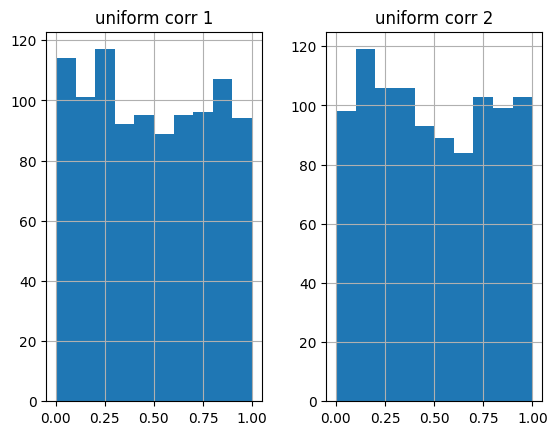

In [15]:
# generate two uniformly distributed features that are correlated with the target
# gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
df['uniform corr 1'] = gen_correlated_uniform_series(df['target'])
df['uniform corr 2'] = gen_correlated_uniform_series(df['target'])

print(df[['uniform corr 1', 'uniform corr 2', 'target']].corr())
df[['uniform corr 1', 'uniform corr 2']].hist();

In [16]:
# create two features that are duplicates of other features
df['duplicate_1'] = df['informative_1']
df['duplicate_2'] = df['informative_2']

In [17]:
# create two numerical features with outliers
df['outliers 1'] = gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
df['outliers 2'] = gen_outliers(mean=3, std_dev=2, size=len(df), outlier_percentage=0.2, outlier_magnitude=2)

In [18]:
# create a numerical feature that needs standard scaling
df['standard scaling'] = gen_standard_scaling()

In [19]:
# create a numerical feature that needs min max scaling
df['min max scaling'] = gen_minmax_scaling()

In [20]:
# generate null values
for col in df.drop(['class', 'informative_1', 'informative_2', 'target', 'duplicate_1', 'duplicate_2'], axis=1).columns:
    df[col] = gen_null(df[col], np.random.choice([0, 5, 10, 20, 30, 50], size=1).item())

In [21]:
# create two features that have constant values
df['constant_1'] = 'constant_value'
df['constant_2'] = 'constant_value'

In [22]:
# create two features with semi constant values
df['semi_constant_1'] = gen_quasi_constants('q_const', variation_percentage = 1)
df['semi_constant_2'] = gen_quasi_constants('q_const', variation_percentage = 1)

In [23]:
# print(df.info())  # check your work

In [24]:
# add duplicates
dupes = df.loc[0:9]
df = pd.concat([df, dupes], axis=0)

# shuffle all columns
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1, axis=1)

# shuffle selected columns
demographic_columns = demographics.columns
remaining_columns = [col for col in df.columns if col not in demographic_columns]
# print(remaining_columns)
np.random.shuffle(remaining_columns)

# Reassemble the DataFrame with the shuffled columns
df = df[list(demographic_columns) + list(remaining_columns)]

# move target to the end of the list
class_var = 'class'
df = df[df.drop('class', axis=1).columns.tolist() + [class_var]]

In [25]:
master = df.copy().reset_index(drop=True)

expected_cols = [
    'binary', 'given_name', 'surname', 'date_of_birth', 'day_of_week',
    'phone_number', 'email', 'address', 'city', 'state', 'zipcode',
    'informative_1', 'informative_2', 'target', 'class',
    'corr_feature_class', 'multicollinearity 1', 'multicollinearity 2',
    'multicollinearity 3', 'multicollinearity 4',
    'uniform corr 1', 'uniform corr 2',
    'outliers 1', 'outliers 2',
    'standard scaling', 'min max scaling',
    'pd qcut1', 'pd qcut2', 'pd qcut3',
    'random choice 2', 'random choice 4', 'random choice 7',
    'random label num 4', 'random label num 14',
    'semi_constant_1', 'semi_constant_2',
]
missing = [c for c in expected_cols if c not in master.columns]
if missing:
    print("Warning, missing expected columns:", missing)

demo_cols = [
    'given_name', 'surname', 'binary',
    'date_of_birth', 'day_of_week',
    'email', 'phone_number',
    'address', 'city', 'state', 'zipcode',
    'semi_constant_1', 'semi_constant_2'
]
demographics = master[demo_cols].copy()

for col in ['binary', 'day_of_week']:
    mask = np.random.rand(len(demographics)) < 0.05
    demographics.loc[mask, col] = np.nan

demographics.to_csv('demographics.csv', index=False)

behavior_cols = [
    'email',  # will be transformed to login_id
    'informative_1', 'informative_2',
    'target', 'class',
    'corr_feature_class',
    'multicollinearity 1', 'multicollinearity 2',
    'multicollinearity 3', 'multicollinearity 4',
    'uniform corr 1', 'uniform corr 2',
    'outliers 1', 'outliers 2',
    'standard scaling', 'min max scaling'
]
behavior = master[behavior_cols].copy()

behavior['login_id'] = (
    behavior['email']
        .str.extract(r'(^[^@]+)')[0]
        .str.lower()
        .str.strip()
)

behavior.drop(columns=['email'], inplace=True)

mask = np.random.rand(len(behavior)) < 0.05
behavior.loc[mask, 'login_id'] = np.nan

behavior.to_csv('behavioral_metrics.csv', index=False)

survey_cols = [
    'phone_number',  # will be transformed
    'pd qcut1', 'pd qcut2', 'pd qcut3',
    'random choice 2', 'random choice 4', 'random choice 7',
    'random label num 4', 'random label num 14',
    'semi_constant_1', 'semi_constant_2'
]
available_cols = [c for c in survey_cols if c in master.columns]
missing_cols   = [c for c in survey_cols if c not in master.columns]

if missing_cols:
    print("Warning: Missing expected columns, skipping:", missing_cols)

survey = master[available_cols].copy()

survey['contact_phone'] = (
    survey['phone_number']
        .astype(str)
        .str.replace(r'\D', '', regex=True)  # keep digits only
        .str[-7:]                             # last 7 digits
)


survey.drop(columns=['phone_number'], inplace=True)
dupe_idx = np.random.choice(survey.index, size=20, replace=False)
survey = pd.concat([survey, survey.loc[dupe_idx]], axis=0).reset_index(drop=True)

survey.to_csv('survey_scores.csv', index=False)

print("Saved demographics.csv, behavioral_metrics.csv, survey_scores.csv")
print(user_seed)


Warning, missing expected columns: ['random label num 4', 'random label num 14']
Saved demographics.csv, behavioral_metrics.csv, survey_scores.csv
3766864616


## Mount Drive

This is optional, if you want to save your data to your Google Drive.

In [26]:
# # Mount Drive
# import shutil

# # Source file path (within your Drive)
# source_file = '/content/filename'

# # Destination path (root of your Drive)
# destination_path = '/content/drive/MyDrive/filepath/filename'

# # Copy the file
# shutil.copy(source_file, destination_path)

# Data Prep Process

## Load Data

You should now have access to **three datasets** (`demographics.csv`, `behavioral_metrics.csv`, `survey_scores.csv`). Treat these as if they came from three different information systems. Do all of your work in this notebook.

Organize your work into clearly labeled sections.

#### 1. Data loading and initial inspection

1. Load all three datasets into pandas DataFrames.
2. For each dataset:

   * Display the first few rows.
   * Report the number of rows and columns.
   * List column names and data types.
   * Briefly describe, in your own words, what each dataset appears to represent.

#### 2. Data merging

1. Identify potential keys or combinations of columns that could be used to **link** the datasets.
2. Engineer any necessary join keys.
3. Merge the three datasets into a single modeling table.
4. Clearly document:

   * Your merging strategy (which keys, which type of joins).
   * How you handled unmatched rows and duplicates.
   * Any assumptions you made.

### Behavioral Metrics Dataset

* Explain here what this dataset is trying to represent

In [27]:
# load the dataset
# print the shape
# print the info
# print the head


### Demographics Dataset

* Explain here what this dataset is trying to represent

In [28]:
# load the dataset
# print the shape
# print the info
# print the head

### Survey Scores Dataset

* Explain here what this dataset is trying to represent

In [29]:
# load the dataset
# print the shape
# print the info
# print the head

## Merge the Datasets

#### Data merging

1. Identify potential keys or combinations of columns that could be used to **link** the datasets.
2. Engineer any necessary join keys.
3. Merge the three datasets into a single modeling table.
4. Clearly document:

   * Your merging strategy (which keys, which type of joins).
   * How you handled unmatched rows and duplicates.
   * Any assumptions you made.

## Types and Characteristics of Data

**Numerical Data**

This refers to columns with a numerical data type, typically integers (`int64`) or floating-point numbers (`float64`). These data represent quantities and are used for mathematical operations.

* **Characteristics**:
    * **Continuous**: Can take any value within a given range (e.g., height, temperature, price).
    * **Discrete**: Can only take specific, distinct values (e.g., number of children, counts).
    * **Order**: The values have a meaningful order and can be compared (e.g., 10 is greater than 5).
    * **Mathematical Operations**: Can be used for calculations like mean, standard deviation, and regression analysis.

**Object/String Data**

This refers to columns with an `object` data type, which in pandas often means they contain text or strings. These are non-numeric and don't have inherent mathematical properties.

* **Characteristics**:
    * **Nominal**: Categories without a meaningful order (e.g., colors like "red," "blue," "green").
    * **Textual**: Contains free-form text, which might require natural language processing (NLP) techniques for analysis.
    * **High Cardinality**: Often contain a large number of unique values, making them difficult to use directly in many machine learning models without preprocessing.

**Categorical Data**

This refers to columns with a `category` data type. A `category` type is a pandas-specific data type that is more memory-efficient than `object` for columns with a limited number of unique values.

* **Characteristics**:
    * **Ordinal**: Categories with a meaningful order (e.g., "low," "medium," "high").
    * **Nominal**: Categories without a meaningful order (as with `df_object`).
    * **Memory Efficient**: Internally stores an integer representation of each category, which is more efficient for storage and computation.

**Categorical Features**

This is a combined group of columns from both the `category` and `object` data types. These columns represent features that are **not** numerical and will likely need to be converted to a numerical format using encoding techniques (like **One-Hot Encoding** or **Label Encoding**) before being used in most machine learning models.

* **Characteristics**:
    * **Mixed Types**: A collection of both `category` and `object` data types.
    * **Preprocessing Required**: These features cannot be directly used in most machine learning algorithms. They must be preprocessed to a numerical representation.
    * **High-level Representation**: This group represents all the columns in a dataset that are qualitative rather than quantitative.

In [30]:
# df_numerical = df.select_dtypes(include='number').columns
# df_object = df.select_dtypes(include=['object']).columns
# df_discreet = df.select_dtypes(include=['category']).columns
# df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
# print("Numerical Data:")
# print(df_numerical)
# print("/nObject Data:")
# print(df_object)
# print("/nDiscreet Data:")
# print(df_discreet)
# print("/nCategorical Data:")
# print(df_categorical_features

## Data Prep

* Clean and prepare your merged dataset

## Exploratory Data Analysis

1. **Understand data structure** - Shape, types, distributions, relationships

2. **Detect data quality issues** - Missing values, duplicates, outliers, errors

3. **Identify patterns and relationships** - Correlations, trends, clusters, anomalies

4. **Test assumptions** - Verify data meets modeling requirements (normality, linearity, etc.)

5. **Generate hypotheses** - Discover insights that inform modeling decisions

6. **Guide feature engineering** - Identify transformations, interactions, and new features

7. **Select appropriate models** - Understand which algorithms suit the data characteristics

8. **Communicate findings** - Visualize key insights for stakeholders

**In short**: EDA helps you understand what you have before you model, ensuring you make informed decisions about data preparation and modeling strategy.

## Feature Selection

## Goals of Feature Selection:

1. **Improve model performance** - Remove irrelevant/redundant features that add noise

2. **Reduce overfitting** - Fewer features = less chance of learning noise from training data

3. **Decrease training time** - Fewer features = faster computation and iteration

4. **Reduce model complexity** - Simpler models are easier to interpret and maintain

5. **Enhance interpretability** - Easier to understand which features drive predictions

6. **Avoid curse of dimensionality** - Prevent performance degradation with too many features

7. **Reduce storage/memory requirements** - Smaller datasets are cheaper to store and process

8. **Remove multicollinearity** - Eliminate highly correlated features that confuse models

9. **Improve generalization** - Better performance on unseen data

**In short**: Feature selection aims to find the **minimum set of features** that provides **maximum predictive power** while keeping the model simple, fast, and interpretable.



## The Models

* Model your data using a Random Forest model, an XGBoost model, and a CatBoost model.
* Be sure to include Gridsearch and Cross Validation as shown in class.
* Show metrics and explain your evaluation.

## Summary